In [1]:
using Plots, ResComp

┌ Info: Precompiling ResComp [5e056418-07d4-4936-a843-989fc06f8afb]
└ @ Base loading.jl:1423


In [2]:
include("../src/CaseStudies.jl")

Main.CaseStudies

In [4]:
lorenz = CaseStudies.get_lorenz(500.0);

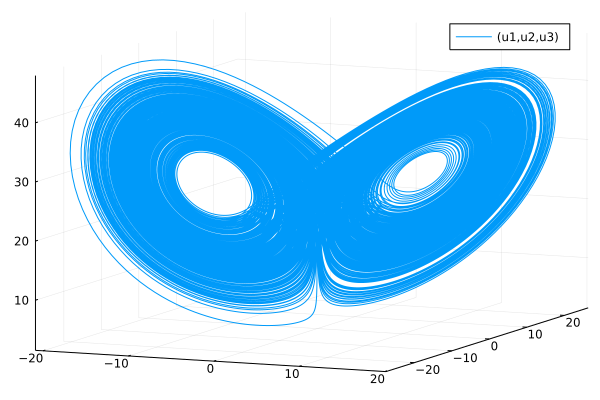

In [5]:
plot(lorenz, vars=(1,2,3))

In [6]:
rho = 0.5
sigma = 0.5
gamma = 0.5
f = tanh
Nu = 3
Nr = 2500
bias_scale = 1
urc = UntrainedResComp(lorenz, rho, sigma, gamma, f, Nu, Nr, bias_scale);

In [7]:
r0 = burn_in(urc, (0.0,50.0));

In [8]:
W_out, train_sol = train(urc, r0, 0.0, (50.0, 250.0));

In [18]:
mapping = hcat([W_out*r for r in train_sol.u]...)';

In [19]:
size(mapping)

(10001, 3)

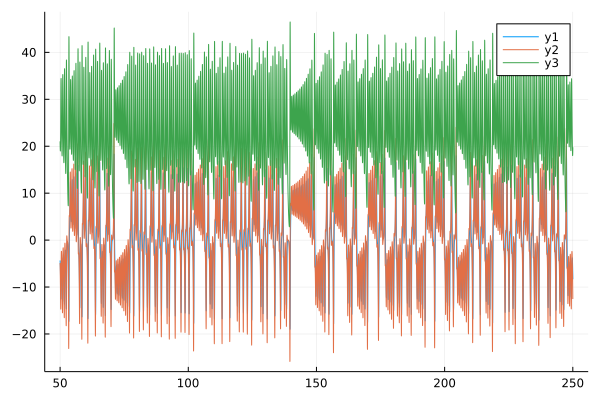

In [21]:
plot(train_sol.t, mapping, vars=(0,1,2,3))

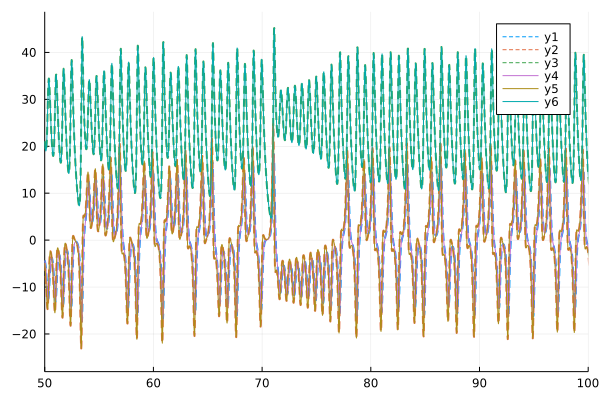

In [32]:
plot(train_sol.t, mapping, linewidth=2, linestyle=:dash)
plot!(train_sol.t, hcat([lorenz(time) for time in train_sol.t]...)')
xlims!(50.0, 100.0)

In [33]:
trc = TrainedResComp(W_out, urc);

In [34]:
vpt(trc, train_sol.u[end], (250.0, 500.0), lorenz)

0.4439646955560477

In [36]:
test_sol = test(trc, train_sol.u[end], (250.0, 500.0), lorenz);

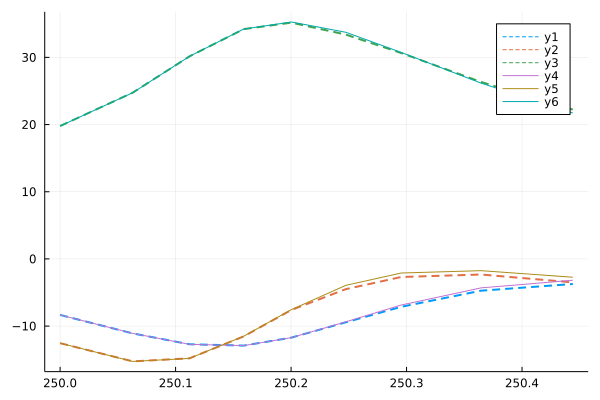

In [37]:
plot(test_sol.t, hcat([W_out*r for r in test_sol.u]...)', linewidth=2, linestyle=:dash)
plot!(test_sol.t, hcat([lorenz(time) for time in test_sol.t]...)')

In [41]:
prediction = predict(trc, train_sol.u[end], (250.0, 300.0));

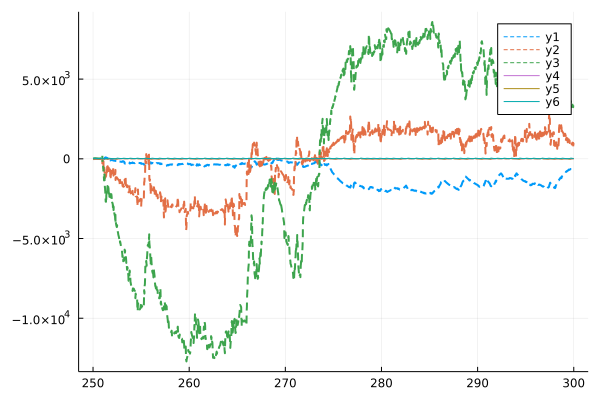

In [42]:
plot(prediction.t, hcat([W_out*r for r in prediction.u]...)', linewidth=2, linestyle=:dash)
plot!(prediction.t, hcat([lorenz(time) for time in prediction.t]...)')